# KNN Algorithm - DM LA-2 
### Team: Santosh Botagi, Agil Srinivas, Suhas KM, Guruprasad K

To begin we will be using the K-Nearest Neighbors algorithm. It is a standard classification algorithm that has the ability to handle multiple classes. In this instance we will use a Social Media Ads dataset to understand and classify user behavior. This is designed to give you a glimpse into the model building process and the various things you need to know / can dive deeper into understanding as a data scientist. 

### Import Libraries and Dataset

In [17]:
# K-Nearest Neighbors (K-NN)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [18]:
dataset.shape

(400, 5)

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.1+ KB


In [23]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [34]:
dataset['User ID'].nunique()

400

As you can see this is very similar to what we have been doing in R. Can anyone explain why we might use "as"? Can anyone explain what we are doing with the X and y variables?

### Split into training and test set

In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train
y_train

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], d

You definitely always need to split into a training and test set. However, this isn't the completely correct way of doing things in the real world if you want to verify and publish your results. What should be done?

### Feature Scaling

In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

What is feature scaling? Why might we have to do it for certain algorithms?

### Training

In [5]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

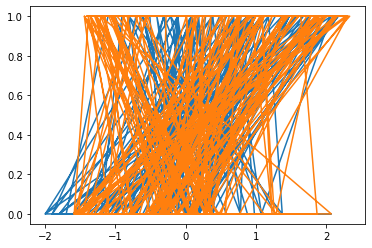

In [38]:
plt.plot(X_train, y_train)

The training phase will likely be the stage that takes the longest amount of time when you are working on models in the real world. It is good to begin with parameters that generally produce good results for the given algorithm, most of the time these packages will have good starting parameters so feel free to run it out of the box as is. As we continue on and start to evaluate the model's performance we will often go back, tweak some parameters, do some feature engineering or extraction, and run various optimizations through either grid search or Bayesian search. One thing to note is that when you are using a classification algorithm like KNN, you need to be wary of overfitting, KNN is especially prone to overfitting, so try to keep you K value or n_neighbors pretty low. 

### Predicting / Testing

In [6]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

This will go through and use the algorithm that you trained, take the variables as input, and then output a 1 or 0. 

### Confusion Matrix

In [7]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

As you can see this is a pretty good result, we only had a few false positives and false negatives. If you are curious how to read this, the values that are correct guesses are on the diagonal of the matrix from top left to bottom right. The bottom left is the false positives and the top right is the false negatives. 

### Visualizing Results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


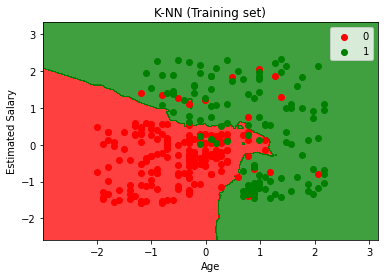

In [8]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


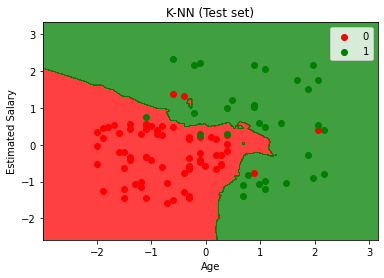

In [9]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Model Performance Evaluation

In [10]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
accuracies.mean()
accuracies.std()

0.04642796092394705

Why should we use cross-validation? What does k-fold mean? Why is it important to use k-fold cross validation? What should be our last step for checking how our model performs?